# Dataset Characteristic of Sales data

In [7]:
# read salesdata in data frame and prepare matplot for later diagrams
import pandas as pd
import matplotlib.pyplot as plt

sales_data = pd.read_csv('../bakery_sales_data/umsatzdaten_gekuerzt.csv')

# convert for later calculation into datetime type
sales_data['Datum'] = pd.to_datetime(sales_data['Datum'])

## Basic information

In [5]:
print(sales_data.head(3))
print("\n")
print(sales_data.tail(3))
print("\n")
print(sales_data.sample(5))
print("\n")
sales_data.info()

       Datum  Warengruppe      Umsatz
0 2013-07-01            1  148.828353
1 2013-07-02            1  159.793757
2 2013-07-03            1  111.885594


          Datum  Warengruppe     Umsatz
9331 2017-12-23            6  84.062223
9332 2017-12-24            6  60.981969
9333 2017-12-27            6  34.972644


          Datum  Warengruppe      Umsatz
3047 2016-12-03            2  303.777432
6231 2015-10-14            4   83.192645
1724 2018-04-26            1  132.024346
1528 2017-10-06            1  143.098737
5623 2014-01-03            4  111.358444


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datum        9334 non-null   datetime64[ns]
 1   Warengruppe  9334 non-null   int64         
 2   Umsatz       9334 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 218.9 KB


- We have 9334 Entries in set
- One value is date of collected sales data in format YYYY-MM-DD
- One value is "Warengruppe" that looks like an interer number that refer to a product group
- "Umsatz" presumably represents the turnover of a product group on a certain day in EUR currency. Interestingly, the values here are stored with six decimal places and in float data type. in CSV, even with up to 12 decimal places, this does not seem necessary for the representation of a turnover value

## Diagramms

### Date destribution of datasets

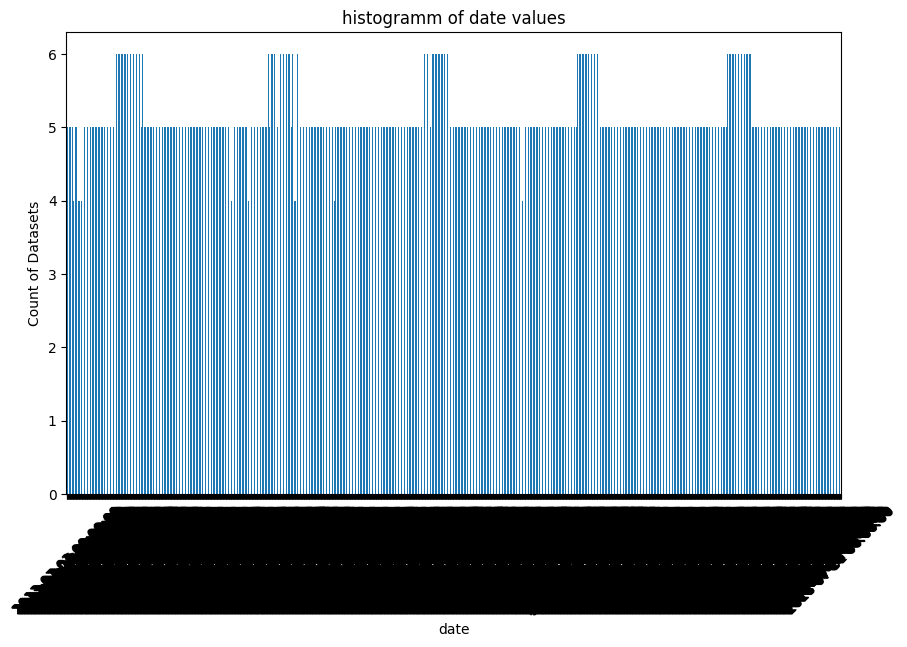

In [8]:
plt.figure(figsize=(10, 6))
# Count values per data to check how many entries "Warengruppe" we have per date
sales_data['Datum'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('date')
plt.ylabel('Count of Datasets')
plt.title('Histogramm of Warngruppen entries per date value')
plt.xticks(rotation=45)
plt.show()

Findings: There are up to 6 product group entries in one day. But sometimes there are fewer.

In [13]:
# find oldest and latest date entry
min_date = sales_data['Datum'].min()
max_date = sales_data['Datum'].max()

print(f"Oldest date: {min_date}")
print(f"Latest date: {max_date}")

# Create a complete list of date values in the range from the oldest to the most recent date
all_dates = pd.date_range(start=min_date, end=max_date)

# Check which data in this area has no sales value
existing_dates = sales_data['Datum'].unique()
missing_dates = all_dates.difference(existing_dates)

print("Data in the period without sales values:")
print(missing_dates)

Oldest date: 2013-07-01 00:00:00
Latest date: 2018-07-31 00:00:00
Data in the period without sales values:
DatetimeIndex(['2013-12-25', '2013-12-26', '2013-12-28', '2014-01-01',
               '2014-04-18', '2014-05-01', '2014-05-03', '2014-05-04',
               '2014-08-17', '2014-12-25', '2014-12-26', '2015-01-01',
               '2015-04-03', '2015-05-01', '2015-12-25', '2015-12-26',
               '2016-01-01', '2016-03-24', '2016-03-25', '2016-07-07',
               '2016-07-18', '2016-08-14', '2016-08-15', '2016-12-17',
               '2016-12-25', '2016-12-26', '2017-01-01', '2017-04-14',
               '2017-05-01', '2017-07-04', '2017-10-23', '2017-10-31',
               '2017-12-25', '2017-12-26', '2018-01-01', '2018-03-30',
               '2018-05-01', '2018-05-21'],
              dtype='datetime64[ns]', freq=None)


In addition to the start and end date of the data set, the list of missing sales shows that this is apparently always the case on public holidays, such as 1 May, when the shop is presumably always closed!

### List all the contained values of "Warengruppe"

In [11]:
# Calculate the different Warengruppen
unique_product_groups = sales_data['Warengruppe'].unique()

print("Different Warengruppen:")
print(unique_product_groups)

Different Warengruppen:
[1 2 3 4 5 6]


Finding: There a only 1 to 6 as possible value for "Warengruppe"

### Check if more than one entry per date + product group exists

In [10]:
# Group by 'Datum' and 'Warengruppe' and count the number of entries
grouped_sales_data = sales_data.groupby(['Datum', 'Warengruppe']).size().reset_index(name='Count')

# Filter the groups with more than one entry
multiple_entries = grouped_sales_data[grouped_sales_data['Count'] > 1]

# Display the results
print("Entries with multiple sales per product group:")
print(multiple_entries)

Entries with multiple sales per product group:
Empty DataFrame
Columns: [Datum, Warengruppe, Count]
Index: []


Finding: There are only unique combinations of "Warengruppe" and "Datum" in Dataset.